# Cloud2Street Technical test

Based on:
Chini, Marco, Ramona Pelich, Luca Pulvirenti, Nazzareno Pierdicca, Renaud Hostache, and Patrick Matgen. “Sentinel-1 InSAR Coherence to Detect Floodwater in Urban Areas: Houston and Hurricane Harvey as A Test Case.” ​Remote Sensing​ 11, no. 2 (January 9, 2019): 107. https://www.mdpi.com/2072-4292/11/2/107.

Relevant background (from above paper):
Category 4 hurricane Harvey’s **first landfall on 25 August 2017** on San Jose Island, Texas. After hitting the Texas mainland on the same day, Harvey weakened to a tropical storm and its speed reduced. As it was only progressing slowly, the amount of rainfall in the region became extremely high and the volume of water took days to drain through rivers, causing widespread catastrophic flooding, most notably in the Houston metropolitan area. The local National Weather Service office in Houston observed **daily rainfall accumulations of 370 mm and 4018 mm on August 26 and 27, respectively**. A total precipitation of 1539 mm in the city of Nederland in southeast Texas, makes Hurricane Harvey the wettest tropical cyclone on record in the United States [43]. As a result, the Houston bayous burst their banks for several days, which led to substantial large-scale flooding, especially to the north and east of the Houston area. The total economic loss from the event amounted to about US$125 billion, with more than 30,000 people evacuated from their homes, more than 17,000 rescues prompted and 106 confirmed deaths in the United States. Hurricane Harvey ties with Hurricane Katrina (2005) as the costliest tropical cyclone on record [44].

Goal: Generate 2 coherence maps w/ Sentinel based on scenes used in paper & do some simple plots:
(from Table 2). Does not mention path, frame, or incidence angle!)
IW (20m)
    * 18 August 2017 - 24 August 2017 IW VV
    * 24 August 2017 - 30  August 2018 IW HH
    
SM (5m)
    * 6 August 2017  - 18 August 2017
    * 18 August 2017 - 30 August 2017

In [1]:
import dinosar
import matplotlib.pyplot as plt
import os
plt.rcParams['font.size'] = 16
%load_ext autoreload
%matplotlib inline

In [62]:
import imp
imp.reload(dinosar.archive.asf)

<module 'dinosar.archive.asf' from '/Users/scott/Documents/GitHub/dinosar/dinosar/archive/asf/__init__.py'>

## 1) Search ASF Archive over region of interest

In [14]:
snwe = dinosar.archive.asf.ogr2snwe('aoi.geojson')
print(snwe)

[28.502488316130417, 30.0286775329042, -96.9268798828125, -94.12261962890625]


In [15]:
dinosar.archive.asf.query_asf(snwe, 'SA')
dinosar.archive.asf.query_asf(snwe, 'SB')

Querying ASF Vertex for SA...
https://api.daac.asf.alaska.edu/services/search/param?intersectsWith=POLYGON+%28%28-94.1226196289062500+28.5024883161304174%2C+-94.1226196289062500+30.0286775329042008%2C+-96.9268798828125000+30.0286775329042008%2C+-96.9268798828125000+28.5024883161304174%2C+-94.1226196289062500+28.5024883161304174%29%29&platform=SA&processingLevel=SLC&beamMode=IW&output=json
Querying ASF Vertex for SB...
https://api.daac.asf.alaska.edu/services/search/param?intersectsWith=POLYGON+%28%28-94.1226196289062500+28.5024883161304174%2C+-94.1226196289062500+30.0286775329042008%2C+-96.9268798828125000+30.0286775329042008%2C+-96.9268798828125000+28.5024883161304174%2C+-94.1226196289062500+28.5024883161304174%29%29&platform=SB&processingLevel=SLC&beamMode=IW&output=json


In [16]:
# Dataframe with metadata from ASF
gf = dinosar.archive.asf.merge_inventories('query_SA.json', 'query_SB.json')

Merging S1A and S1B inventories


In [17]:
dinosar.archive.asf.summarize_inventory(gf)

            Start        Stop  Dates  Frames   Direction       UTC
Orbit                                                             
70     2016-03-21  2016-03-21      1       1  DESCENDING  12:14:58
41     2017-08-29  2017-08-29      1       2  DESCENDING  12:31:45
34     2016-04-12  2019-01-15     65     130   ASCENDING  00:27:17
143    2015-07-18  2019-02-03    177     184  DESCENDING  12:23:23
136    2016-03-26  2019-02-03     63     113   ASCENDING  00:18:55
107    2015-03-18  2019-02-01     76     140   ASCENDING  00:35:19
Approximate Archive size = 2.85 Tb


In [18]:
# Save standardized metadata, then load for plotting
dinosar.archive.asf.save_inventory(gf)
gf = dinosar.archive.asf.load_inventory('query.geojson')

/Users/scott/miniconda3/envs/dinosar/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


Saved inventory:  query.geojson


,index,absoluteOrbit,baselinePerp,beamMode,beamModeType,beamSwath,browse,catSceneId,centerLat,centerLon,...,stopTime,stringFootprint,thumbnailUrl,track,varianceTroposphere,utc,orbitCode,geometry,timeStamp,dateStamp
345,345,15681,NA,IW,IW,NA,None,NA,28.9996,-95.838,...,2017-03-14T00:26:38,"POLYGON((-94.710976 30.039476,-94.382278 28.35...",NA,34,NA,00:26:38,0,"POLYGON ((-94.710976 30.039476, -94.382278 28....",2017-03-14 00:26:38,2017-03-14


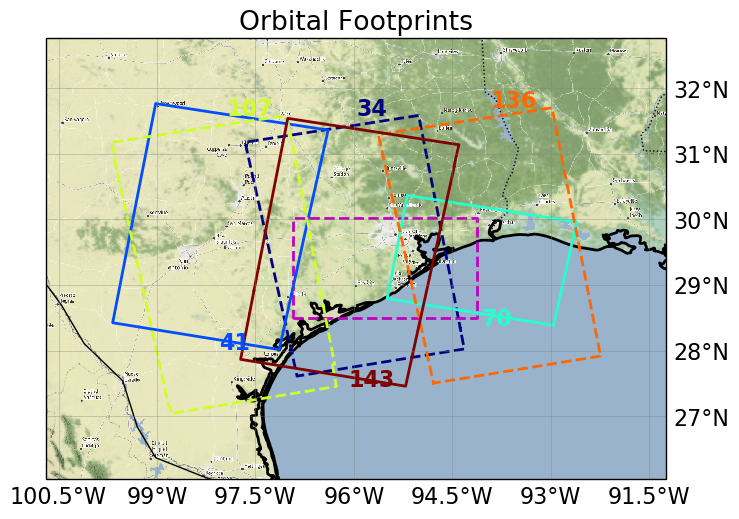

In [22]:
polygon = gf.geometry.cascaded_union
w,s,e,n = polygon.bounds
snwe = [s,n,w,e]
dinosar.archive.plot.plot_map(gf,snwe,vectorFile='aoi.geojson')
plt.savefig('map.pdf', bbox_inches='tight')

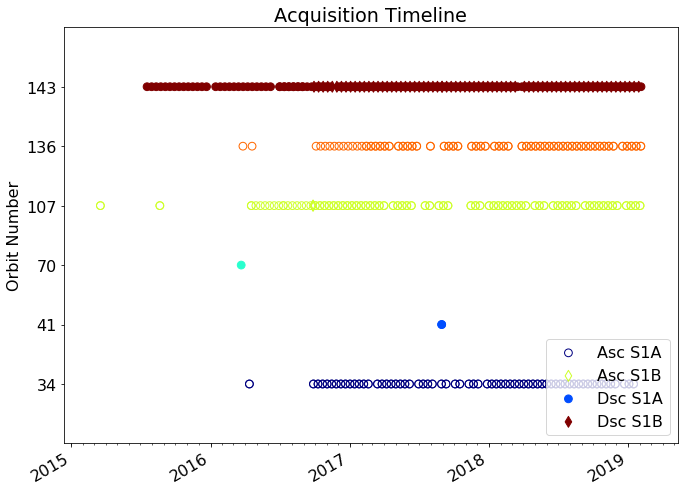

In [20]:
dinosar.archive.plot.plot_timeline_sentinel(gf)
plt.savefig('timeline.pdf', bbox_inches='tight')

In [30]:
# Print acquisitions from path 143
dinosar.archive.asf.summarize_orbits(gf)
!cat acquisitions_143.csv

Saving acquisitions_34.csv ...
Saving acquisitions_41.csv ...
Saving acquisitions_70.csv ...
Saving acquisitions_107.csv ...
Saving acquisitions_136.csv ...
Saving acquisitions_143.csv ...
,sceneDateString,platform,dt,nFrames
0,2015-07-18,Sentinel-1A,0,1
1,2015-07-30,Sentinel-1A,12,1
2,2015-08-11,Sentinel-1A,12,1
3,2015-08-23,Sentinel-1A,12,1
4,2015-09-04,Sentinel-1A,12,1
5,2015-09-16,Sentinel-1A,12,1
6,2015-09-28,Sentinel-1A,12,1
7,2015-10-10,Sentinel-1A,12,1
8,2015-10-22,Sentinel-1A,12,1
9,2015-11-03,Sentinel-1A,12,1
10,2015-11-15,Sentinel-1A,12,1
11,2015-11-27,Sentinel-1A,12,1
12,2015-12-09,Sentinel-1A,12,1
13,2015-12-21,Sentinel-1A,12,1
14,2016-01-14,Sentinel-1A,24,1
15,2016-01-26,Sentinel-1A,12,1
16,2016-02-07,Sentinel-1A,12,1
17,2016-02-19,Sentinel-1A,12,1
18,2016-03-02,Sentinel-1A,12,1
19,2016-03-14,Sentinel-1A,12,1
20,2016-03-26,Sentinel-1A,12,1
21,2016-04-07,Sentinel-1A,12,1
22,2016-04-19,Sentinel-1A,12,1
23,2016-05-01,Sentinel-1A,12,1
24,2016-05-13,Sentinel-1A,12,1
25,2016-05

In [55]:
# Get the frame IDs from ASF
date_from = '2017-08-01'
date_to = '2017-08-31'
relOrbit = 143

# More complicated than it needs to be (copied code from previous version...)
df = gf.query('(relativeOrbit == @relOrbit) & (dateStamp > @date_from) & (dateStamp < @date_to)')
df.fileName.tolist()
# From study: 
# 2017-08-24T12:22:48 --> S1A_IW_SLC__1SDV_20170824T122248_20170824T122318_018065_01E54E_5C27.zip
# 2017-08-30T12:22:03 --> S1B_IW_SLC__1SDV_20170830T122203_20170830T122233_007169_00CA2C_C92C.zip
#print(df.keys())
#print(df.loc[:, ('frameNumber', 'firstFrame', 'startTime','fileName')])

# NOTE: can't use standard frame number (491 vs 492)
#df.iloc[0]

# Drop first frame
df = df.iloc[1:]
df.loc[:, ('frameNumber', 'firstFrame', 'startTime','fileName')]

,frameNumber,firstFrame,startTime,fileName
539,491,2980,2017-08-30T12:22:03,S1B_IW_SLC__1SDV_20170830T122203_20170830T1222...
540,492,2983,2017-08-18T12:22:05,S1B_IW_SLC__1SDV_20170818T122205_20170818T1222...
541,492,2983,2017-08-06T12:22:05,S1B_IW_SLC__1SDV_20170806T122205_20170806T1222...
273,492,2983,2017-08-12T12:22:47,S1A_IW_SLC__1SDV_20170812T122247_20170812T1223...
270,492,2983,2017-08-24T12:22:48,S1A_IW_SLC__1SDV_20170824T122248_20170824T1223...


# Query for stripmap scenes

In [66]:
dinosar.archive.asf.query_asf(snwe, 'SA', beam='S1,S2,S3,S4,S5,S6')
dinosar.archive.asf.query_asf(snwe, 'SB', beam='S1,S2,S3,S4,S5,S6')

Querying ASF Vertex for SA...
https://api.daac.asf.alaska.edu/services/search/param?intersectsWith=POLYGON+%28%28-92.2406309999999934+27.0443479999999994%2C+-92.2406309999999934+31.7656710000000011%2C+-99.6876599999999939+31.7656710000000011%2C+-99.6876599999999939+27.0443479999999994%2C+-92.2406309999999934+27.0443479999999994%29%29&platform=SA&processingLevel=SLC&beamMode=S1%2CS2%2CS3%2CS4%2CS5%2CS6&output=json
Querying ASF Vertex for SB...
https://api.daac.asf.alaska.edu/services/search/param?intersectsWith=POLYGON+%28%28-92.2406309999999934+27.0443479999999994%2C+-92.2406309999999934+31.7656710000000011%2C+-99.6876599999999939+31.7656710000000011%2C+-99.6876599999999939+27.0443479999999994%2C+-92.2406309999999934+27.0443479999999994%29%29&platform=SB&processingLevel=SLC&beamMode=S1%2CS2%2CS3%2CS4%2CS5%2CS6&output=json


In [68]:
# Dataframe with metadata from ASF
gf = dinosar.archive.asf.merge_inventories('query_SA.json', 'query_SB.json')
dinosar.archive.asf.summarize_inventory(gf)

Merging S1A and S1B inventories
            Start        Stop  Dates  Frames   Direction       UTC
Orbit                                                             
41     2016-06-11  2019-02-02    149     149  DESCENDING  12:31:30
34     2016-06-11  2019-02-02     77      77   ASCENDING  00:26:50
136    2015-02-24  2019-01-28     73      73   ASCENDING  00:18:41
Approximate Archive size = 1.495 Tb


In [71]:
# Save standardized metadata, then load for plotting
dinosar.archive.asf.save_inventory(gf)
gf = dinosar.archive.asf.load_inventory('query.geojson')

Saved inventory:  query.geojson


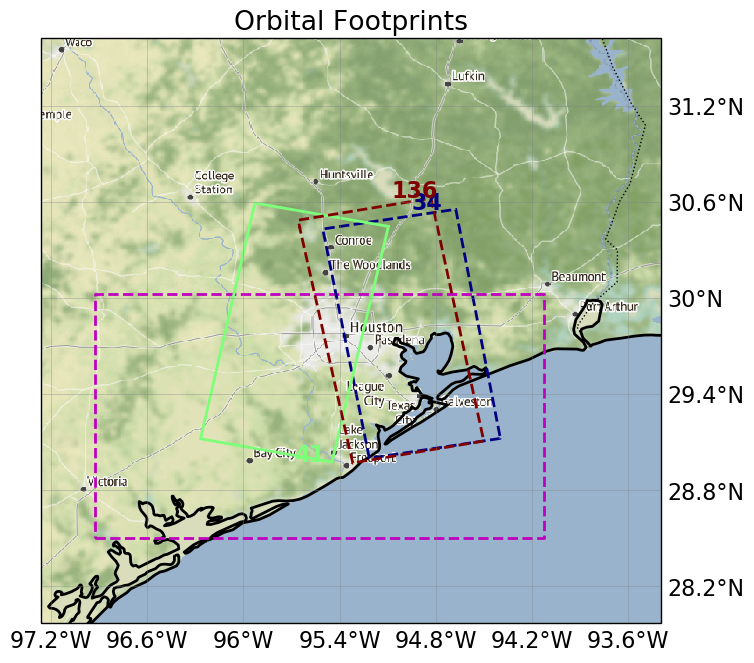

In [72]:
polygon = gf.geometry.cascaded_union
w,s,e,n = polygon.bounds
snwe = [s,n,w,e]
dinosar.archive.plot.plot_map(gf,snwe,vectorFile='aoi.geojson')
plt.savefig('map.pdf', bbox_inches='tight')

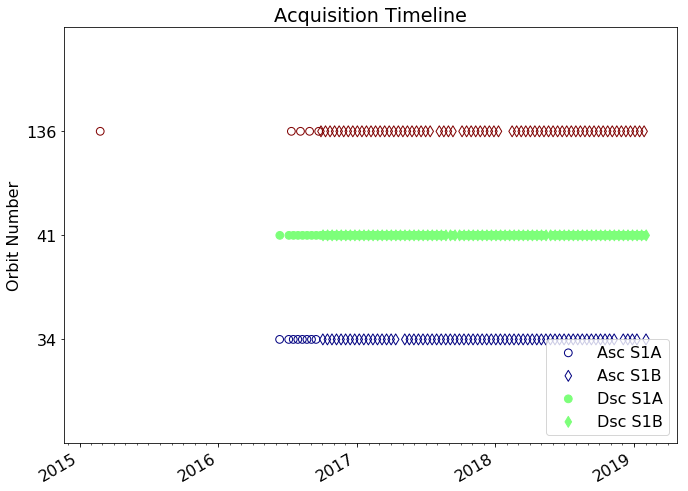

In [73]:
dinosar.archive.plot.plot_timeline_sentinel(gf)
plt.savefig('timeline.pdf', bbox_inches='tight')